In [1]:
from ipynb.fs.defs.functions import *

from datetime import datetime
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import time
import pandas as pd
import random as rnd



In [2]:
graph_enum_6 = iso_graph(get_all_graphs(6))

In [ ]:
start_time = datetime.now()

weighted_networks_Bd = np.zeros((112, 100), dtype=object)
for i in range(112):
    for j in range(100):
        G=graph_enum_6[i]
        for u,v in G.edges():
            G[u][v]['weight']=rnd.random()
        weighted_networks_Bd[i,j]=[matrix_solver(T_weightMat(G,k/10))-theoretic_fixation_moran(6,k/10) for  k in range(1,20)]
        
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))        

np.save('weighted_networks_Bd.npy' , weighted_networks_Bd )

In [7]:
####loading data

weighted_networks_Bd = np.load('weighted_networks_Bd.npy', allow_pickle= True)

In [20]:
##classifying 

classifier_100 = np.zeros((112, 100), dtype=object)

check=[]

for i in range(112):
    for j in range(100):
        for k in range(3,19):
            if k==9:
                continue
            check.append(np.sign(weighted_networks_100[i][j][k]))
        if check==[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]:
            #suppressor
            classifier_100[i,j]= "Suppressor"
        elif check==[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1]:
            #amplifier
            classifier_100[i,j]= "Amplifier"
        elif check==[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]:
            #isothermal
            classifier_100[i,j]= "Isothermal"
        else:
            #neither
            classifier_100[i,j]= "Neither"
        check=[]
            

In [21]:
###list of suppressors and 'neither' networks
amp_100=0
sup_100=0
neither_100=0
iso_100=0

sup_list_100=[]
neither_list_100=[]
iso_list_100=[]
sup_num=[]
for i in range(112):
    c=0
    for j in range(100):
        if classifier_100[i,j]== "Suppressor":
            c+=1
            sup_100+=1
            sup_list_100.append([i,j])
        elif classifier_100[i,j]== "Amplifier":
            amp_100+=1
        elif classifier_100[i,j]== "Isothermal":
            iso_100+=1
            iso_list_100.append([i,j])
        else:
            neither_100+=1
            neither_list_100.append([i,j])
    sup_num.append(c)
            
            
print(amp_100, sup_100, neither_100,iso_100)

6165 3862 1173 0


The number of amplifiers and suppressors under Bd updating:

| Amplifiers | Suppressors | Neither |
|----------|----------|----------|
| 6165 | 3862 |1173 |


## Scatterplots

In [5]:
weighted_networks_10_r_1_3=[matrix_solver(T_weightMat(graph_enum_6[j],1.3))-theoretic_fixation_moran(6,1.3) for  j in range(112)]
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]

#weighted_networks_10_r_0_9 = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
print(indices_sorted_by_value)


In [3]:

weighted_networks_100 = np.load('weighted_networks_100.npy', allow_pickle= True) 
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]

weighted_networks_10_r_1_3=[matrix_solver(T_weightMat(graph_enum_6[j],1.3))-theoretic_fixation_moran(6,1.3) for  j in range(112)]
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]

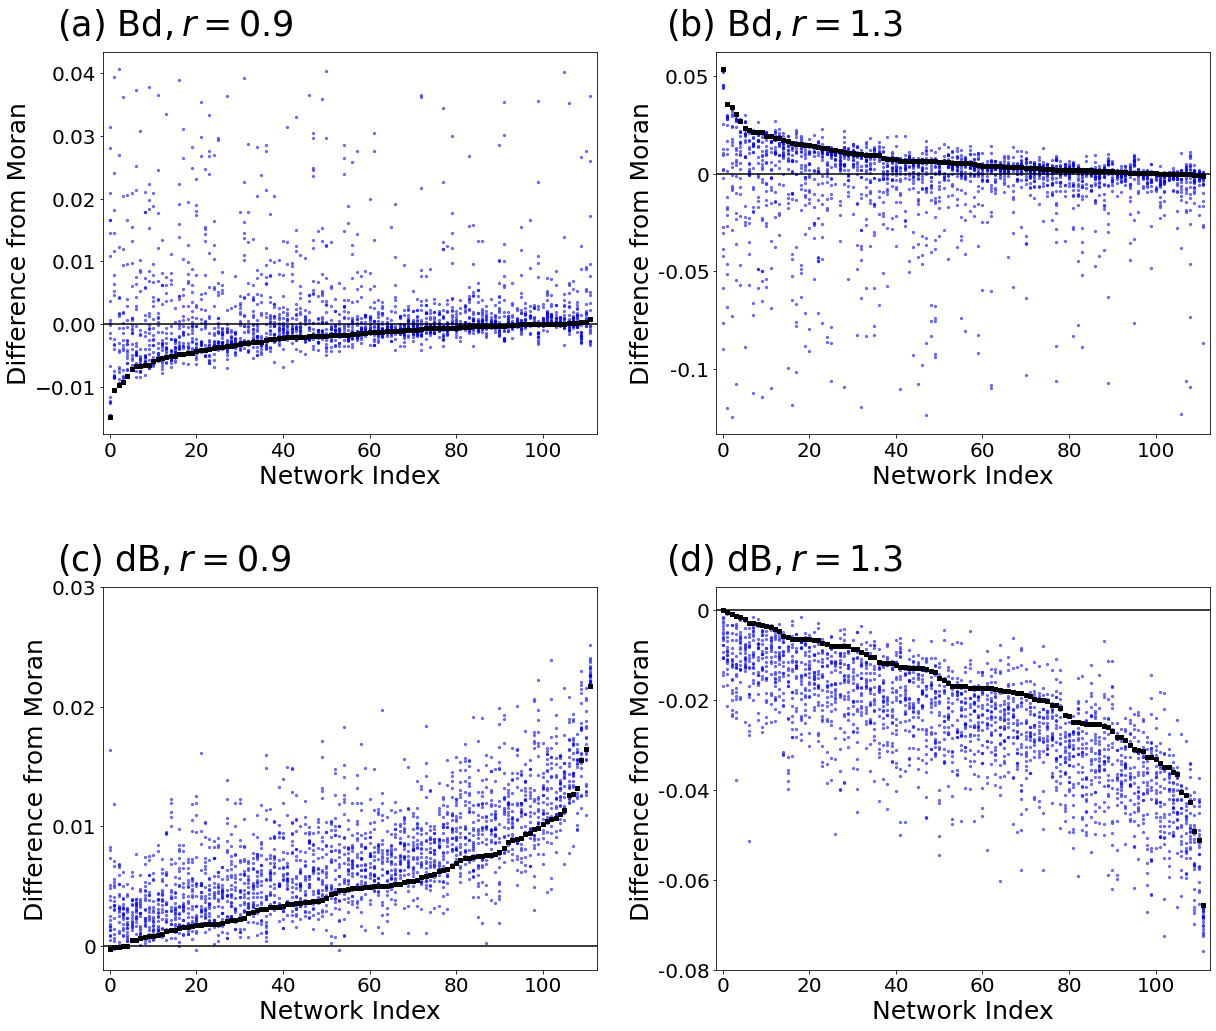

In [9]:
import matplotlib.pyplot as plt
import numpy as np



# Constants
dim = 20
radius = 5

# Create subfigures
fig, axs = plt.subplots(2, 2, figsize=(17, 15))

# First subplot (Top Left)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    axs[0, 1].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[0, 1].scatter(j, weighted_networks_10_r_1_3[indices_sort_by_value[j]], s=2*radius, color='black',marker='s')
#axs[0, 1].set_title("Bd, $r=1.3$", fontsize=30)

# Second subplot (Top Right)
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    axs[0, 0].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[0, 0].scatter(j, weighted_networks_10_r_0_9[indices_sorted_by_value[j]], s=2*radius, color='black',marker='s')
#axs[0, 0].set_title("Bd, $r=0.9$", fontsize=30)

# Third subplot (Bottom Left)
indices_sort_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=True)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sort_by_value[j]][i][12] for i in range(dim)]
    axs[1, 1].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[1, 1].scatter(j, graph_6_nodes_db_unweighted_r_1_3[indices_sort_by_value[j]], s=2*radius, color='black',marker='s')
#axs[1, 1].set_title("Db, $r=1.3$", fontsize=30)

# Fourth subplot (Bottom Right)
indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    axs[1, 0].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[1, 0].scatter(j, graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]], 
                      s=2*radius, color='black',marker='s')
#axs[1, 0].set_title("Db, $r=0.9$", fontsize=30)


axs[0, 0].axhline(y = 0, color = 'black')
axs[1, 0].axhline(y = 0, color = 'black')
axs[0, 1].axhline(y = 0, color = 'black')
axs[1, 1].axhline(y = 0, color = 'black')

axs[0, 0].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[0, 0].set_ylim([0, 8])      # Set y-axis limits
axs[0, 1].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[0, 1].set_ylim([0, 8])      # Set y-axis limits
axs[1, 0].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[1, 0].set_ylim([0, 8])      # Set y-axis limits
axs[1, 1].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[1, 1].set_ylim([0, 8])      # Set y-axis limits

# Change xtick and ytick size
axs[0,0].tick_params(axis='x', labelsize=20)
axs[1,0].tick_params(axis='x', labelsize=20) 
axs[0,1].tick_params(axis='x', labelsize=20) 
axs[1,1].tick_params(axis='x', labelsize=20)
axs[0,0].tick_params(axis='y', labelsize=20)
axs[1,0].tick_params(axis='y', labelsize=20) 
axs[0,1].tick_params(axis='y', labelsize=20) 
axs[1,1].tick_params(axis='y', labelsize=20)# Change xtick label size
#ax.tick_params(axis='y', labelsize=32) 
# Set common labels and adjust layout
for ax in axs.flat:
    ax.set_xlabel('Network Index', fontsize=25)
    ax.set_ylabel('Difference from Moran', fontsize=25)



#fig.suptitle('Comparison of Network Behaviors', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.text(0.0495, 0.955, '(a) Bd$, r=0.9$', fontsize=35)
fig.text(0.547, 0.955, '(b) Bd$, r=1.3$', fontsize=35)
fig.text(0.0495, 0.46, '(c) dB$, r=0.9$', fontsize=35)
fig.text(0.547, 0.46, '(d) dB$, r=1.3$', fontsize=35)
# Save and display
# ticklabels
axs[0,1].set_yticks([-0.1,-0.05,0,0.05])
axs[0,1].set_yticklabels(['-0.1','-0.05','0','0.05'])
axs[1,0].set_yticks([0,0.01,0.02,0.03])
axs[1,0].set_yticklabels(['0','0.01','0.02','0.03'])
axs[1,1].set_yticks([-0.08,-0.06,-0.04,-0.02,0])
axs[1,1].set_yticklabels(['-0.08','-0.06','-0.04','-0.02','0'])

axs[1, 0].set_ylim([0-0.002,0.03]) 
axs[1, 1].set_ylim([-0.08,0+0.005]) 

plt.subplots_adjust(hspace=0.4) 
plt.savefig('combined_scatterplot.pdf')#, bbox_inches="tight")
plt.show()







In [22]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_0_9[i])
    [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(20)]
    c=c+sum(1 for x in [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(20)] if x > 0)

In [23]:
c/(112*20)

0.45

In [18]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i])
    [weighted_networks_100[indices_sorted_by_value[j]][i][12] for i in range(20)]
    c=c+sum(1 for x in [weighted_networks_100[indices_sorted_by_value[j]][i][12] for i in range(20)] if x < 0)

In [19]:
c/(112*20)

0.4375

In [33]:
import math
#sign = math.sign(number)
c=0
for j in range(112):
    a=[weighted_networks_100[j][i][8] for i in range(20)]
    b=[weighted_networks_100[j][i][12] for i in range(20)]
    for k in range(20):
        if a[k]>0 and b[k]<0:
            c+=1
print(c/(112*20))


    

    
    

    

0.43125


In [24]:
    c=c+sum(1 for x in [weighted_networks_100[j][i][8] for i in range(20)] if x > 0)
    c=c+sum(1 for x in [weighted_networks_100[j][i][12] for i in range(20)] if x < 0)

In [16]:
c=0
a=[]
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sorted_by_value[j]] for i in range(20)]
    c=c+sum(1 for x in a if x > 0)
print(c/(112*20))

0.7433035714285714


In [ ]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sorted_by_value[j] for i in range(20)]
    c=c+sum(1 for x in a if x > 0)
print(c/(112*20))

In [17]:
c=0
a=[]
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][12]-weighted_networks_10_r_1_3[indices_sorted_by_value[j]] for i in range(20)]
    c=c+sum(1 for x in a if x < 0)
print(c/(112*20))

0.7571428571428571


In [18]:
c=0
dim=20
for j in range(112):
    indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
    c=c+sum(1 for x in [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8]-graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]] for i in range(dim)] if x > 0)
print(c/(112*20))


0.8299107142857143


In [23]:
c/(112*20)

1.0

In [23]:
c=0
dim=20
for j in range(112):
    indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=False)
    c=c+sum(1 for x in [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][12]-graph_6_nodes_db_unweighted_r_1_3[indices_sorted_by_value[j]] for i in range(dim)] if x < 0)
print(c/(112*20))


0.853125


In [21]:
round(82.991, 2)

82.99